In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
from scipy.interpolate import interp1d


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Something up with the L908-5 NUV sed.

ODLM27020
ODLM27030


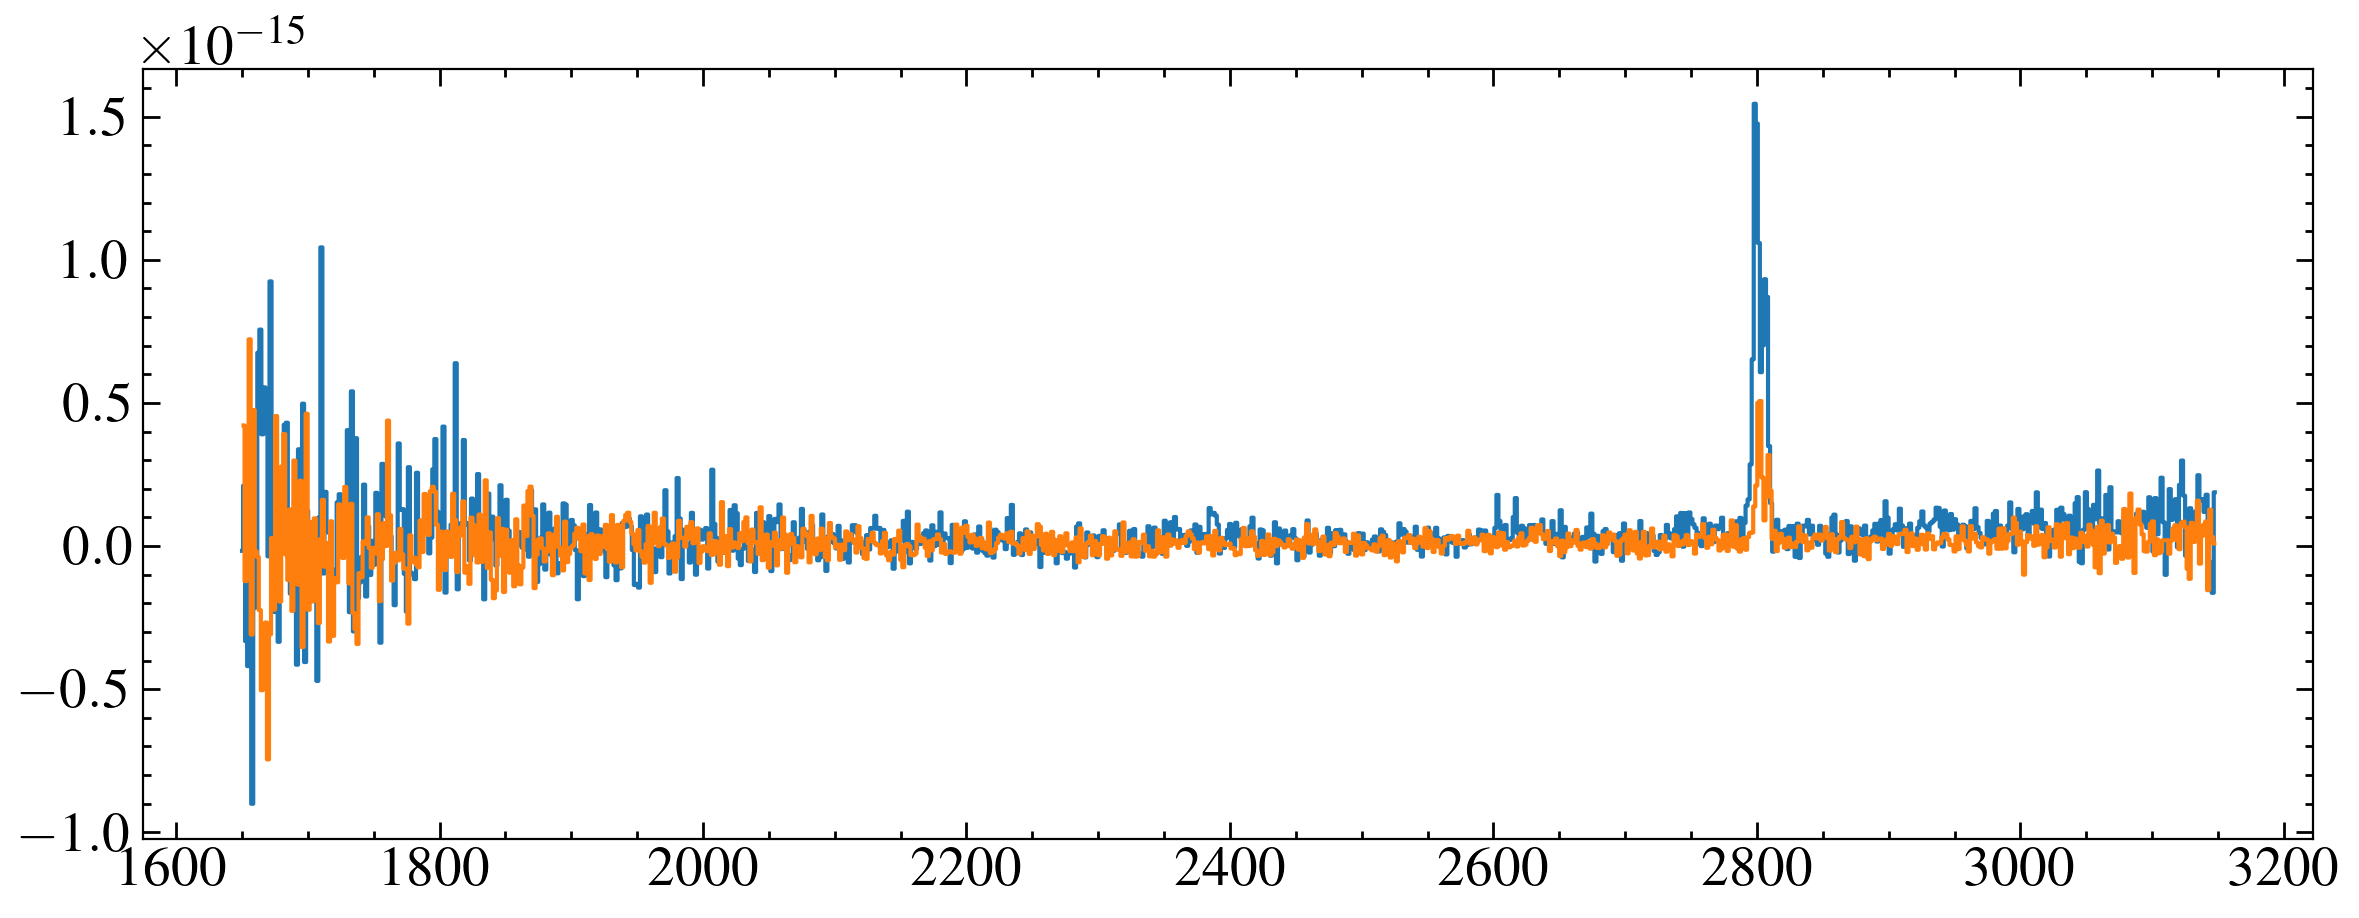

In [2]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/data/l980-5/'
nroots = ['ODLM27020', 'ODLM27030']
for root in nroots:
    print(root)
    data = fits.getdata('{}{}_x1d.fits'.format(path, root.lower()), 1)[0]
    w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    mask = (w > 1650) & (dq==0)
    plt.step(w[mask], f[mask], where='mid')
    # plt.step(w[mask], e[mask], where='mid')
    # plt.show()

Both obs had a guide star lock failure? So both suspect? Exp time of 020 is shorter, can see that in the noise.

In [3]:
sed = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_var-res-sed.fits', 1)
sw, sf, se = sed['WAVELENGTH'], sed['FLUX'], sed['ERROR']

ODLM27020


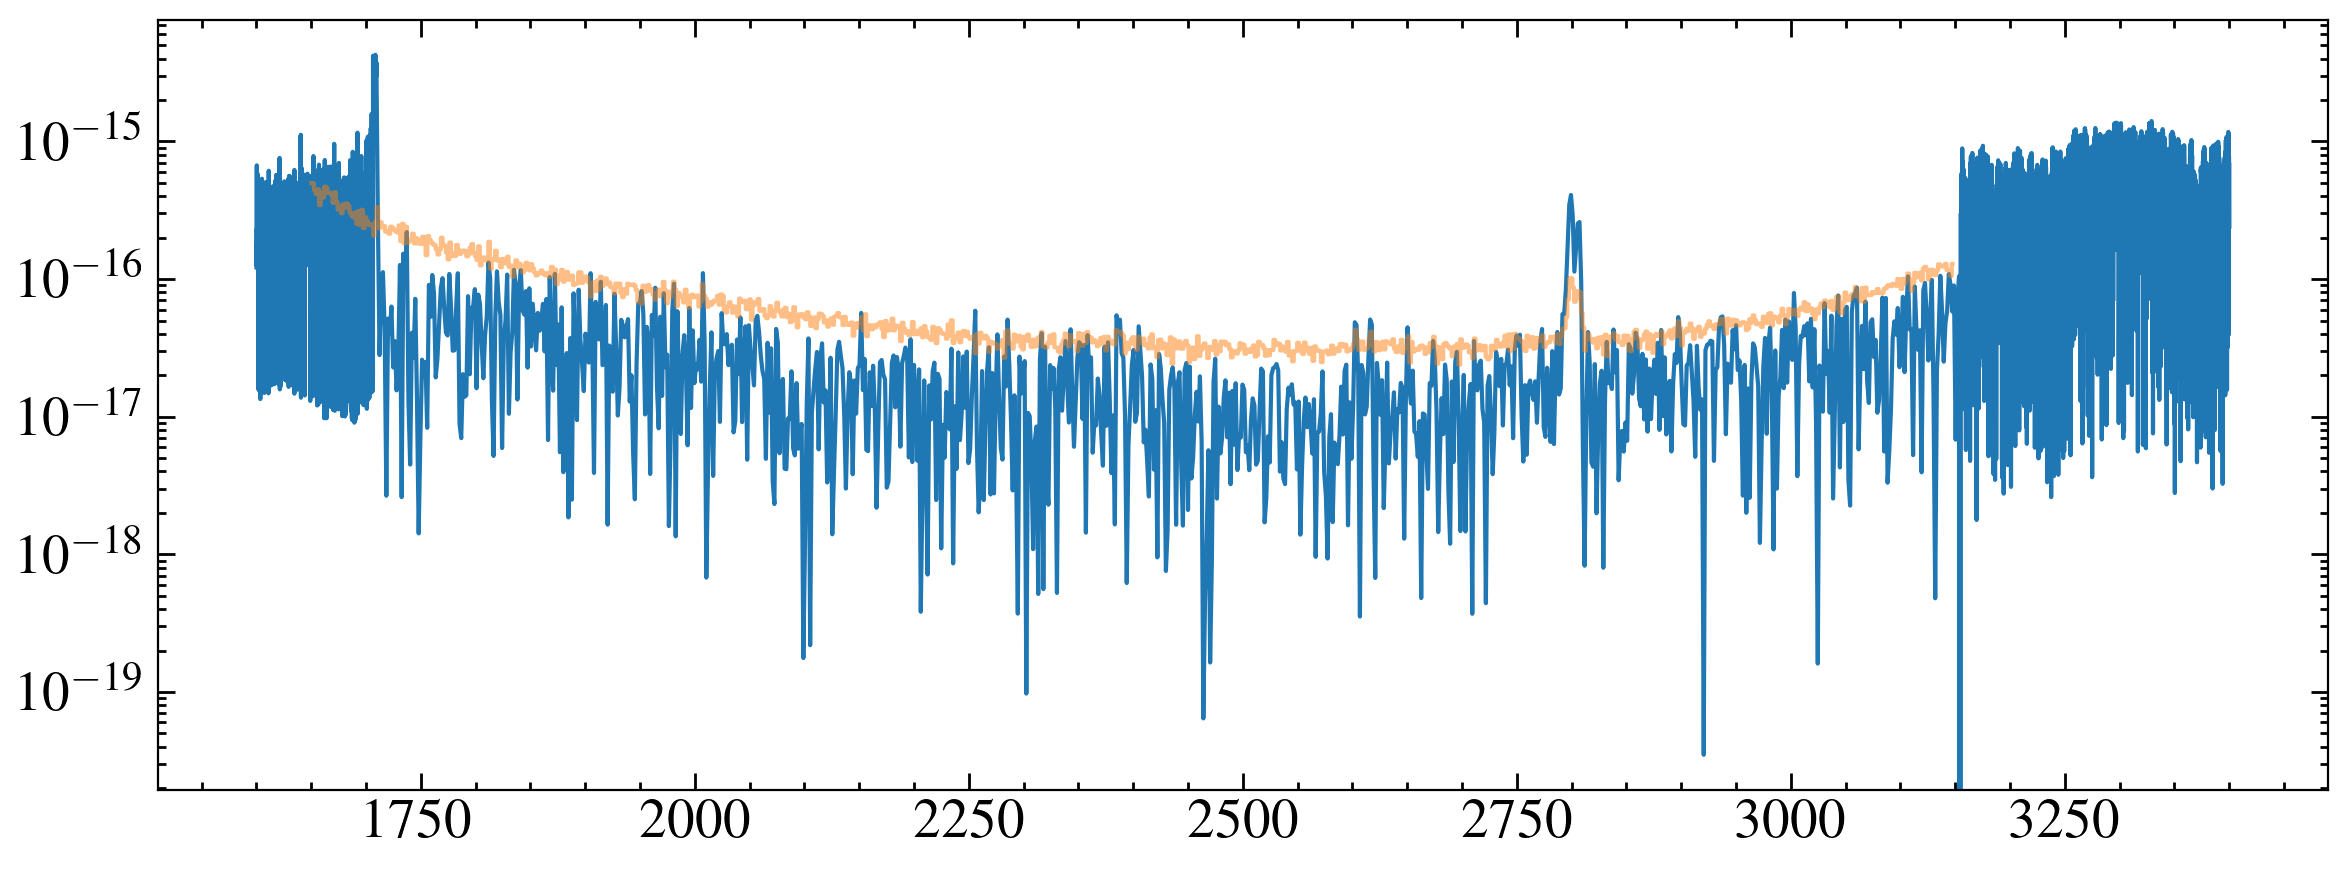

In [4]:
mask = (sw > 1600) & (sw < 3400)


# plt.plot(sw[mask], sf[mask])
plt.plot(sw[mask], se[mask])
for root in nroots[0:1]:
    print(root)
    data = fits.getdata('{}{}_x1d.fits'.format(path, root.lower()), 1)[0]
    w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    mask = (w > 1650) & (dq==0)
    # plt.step(w[mask], f[mask], where='mid', alpha=0.5)
    plt.step(w[mask], e[mask], where='mid', alpha=0.5)
plt.yscale('log')

In [5]:
import gPhoton

In [6]:
skypos = [215.313, -1.122]


In [7]:
nuv_exps = gPhoton.gFind(band='NUV', skypos=skypos)

NUV: 2647.0s (raw) in 3 exposures.
    [ 862997305.995, 862997409.995 ], 104.000 seconds
    [ 894440482.995, 894441983.995 ], 1501.000 seconds
    [ 926924842.995, 926925884.995 ], 1042.000 seconds


In [8]:
target = 'l980-5'
step_size = 20.
phot_rad = 0.0045
ap_in = 0.0050
ap_out = 0.0060

In [9]:
# nuv_photon_events = gPhoton.gAperture(band='NUV', skypos=skypos, radius=phot_rad, 
#                                       annulus=[ap_in, ap_out], verbose=3, csvfile='{}_nuv_all_lc.csv'.format(target), overwrite=True)

# print(nuv_photon_events['flux_bgsub'], nuv_photon_events['flux_bgsub_err'])

# weights = 1/(nuv_photon_events['flux_bgsub_err']**2)
# nflux = np.average(nuv_photon_events['flux_bgsub'], weights= weights)
# nerr =  (1 / np.sum(weights))**0.5

# print(nflux, nerr)

Using v1.28.9 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [215.313, -1.122]
 tranges: None
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  False
 csvfile: l980-5_nuv_all_lc.csv
 verbose: 3
[9.82871586e-17 9.04845258e-17 3.40609166e-17] [3.08094525e-17 9.64628308e-18 1.28138535e-17]                           
7.173628004568359e-17 7.476305926582723e-18


In [10]:
nw, nf, ne  = 2310,7.173628004568359e-17, 7.476305926582723e-18

In [15]:
swift = fits.getdata('/media/david/2tb_ext_hd/hddata/mega_muscles/swift_images/l980-5/00011207004/uvot/products/l980-5_uvm2_phot.fits', 1)
sf, se = swift['AB_FLUX_AA'], swift['AB_FLUX_AA_ERR']
print(sf, se)
sw, sup = 2246, 3*se

[6.143706e-18] [7.796842e-18]


ODLM27020
ODLM27030


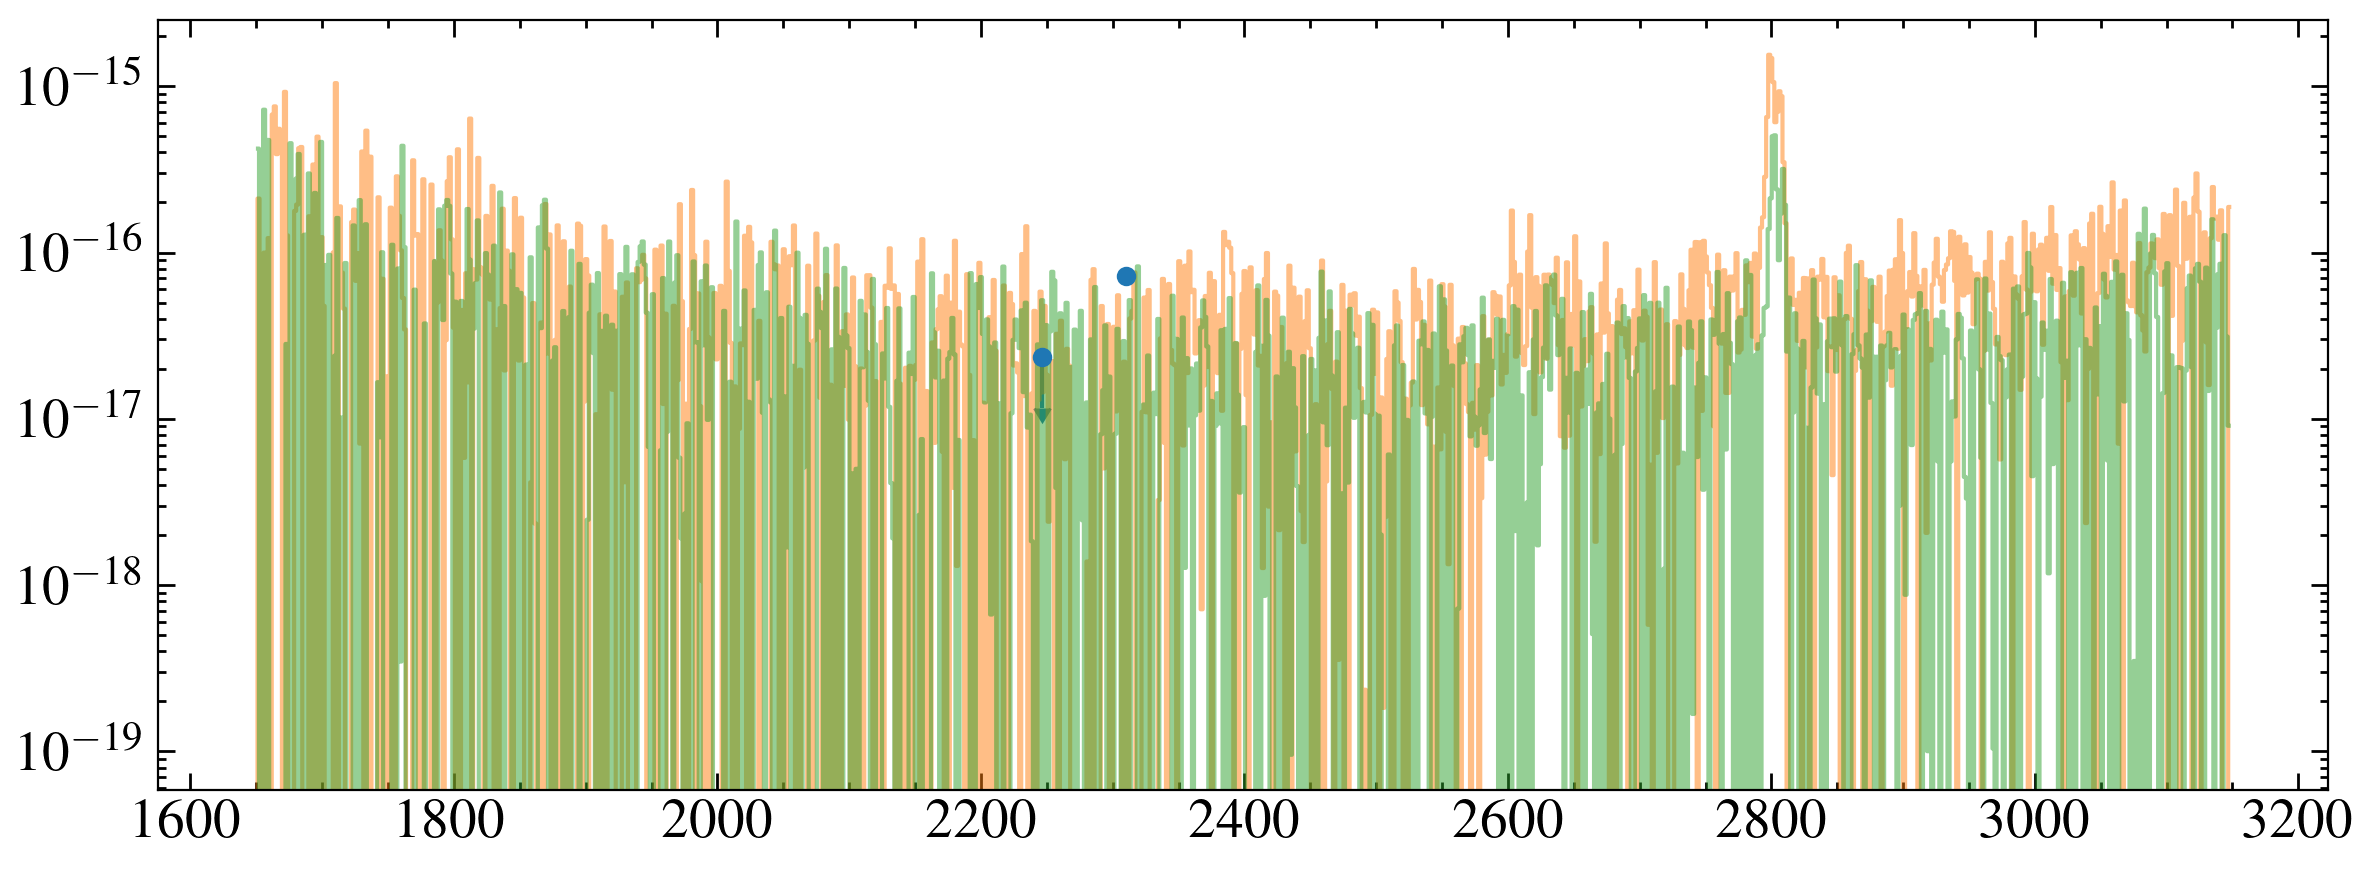

In [25]:
mask = (sw > 1600) & (sw < 3400)


# plt.plot(sw[mask], sf[mask])

plt.errorbar(nw, nf, yerr=ne, marker='o', ls='none')
plt.errorbar(sw, sup, yerr=0.5*sup, uplims=True, marker='o', c='C0')

for root in nroots:
    print(root)
    data = fits.getdata('{}{}_x1d.fits'.format(path, root.lower()), 1)[0]
    w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    mask = (w > 1650) & (dq==0)
    plt.step(w[mask], f[mask], where='mid', alpha=0.5)
plt.yscale('log')   

Flux looks good according to Galex. Should assemble Galex and Swift fluxes for semi-emp models. Got a swift UVM2 upper limit. Flux cal looks good

Flux looks good according to Galex. Should assemble Galex and Swift fluxes for semi-emp models. Got a swift UVM2 upper limit